# Exercise 1:

We'll be working with the same dataset as we did last week, i.e., the one where we try to predict porosity from logs using regression. Open the `core_data.csv` dataset in your `Datasets` folder. To make your life a little easier, I have already cleaned the dataset for you: there are no duplicates or null values and the data has been scaled using a `MinMaxScaler` (except for our target variable). Don't take my word for it: explore the data quickly to convince yourself that this is the case.

Now do the following using a `random_state` value of 42:
1. Create a `y` target variable that contains only the `Porosity (vol%)` values, and a feature set (`X`) that contains all of the other features
2. Split `X` and `y` into `X_train`/`y_train` (70% of the data) and `X_test`/`y_test` (30% of the data)
3. Further split the `X_train`/`y_train`  into `X_train`/`y_train` (80% of the original `X_train`/`y_train` ) and `X_val`/`y_val`  (20% of the original `X_train`/`y_train` )

In the end, you should have 6 variables: `X_train`, `X_val`, `X_test`, `y_train`, `y_val`, `y_test`.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Already preprocessed, so we don't need to do anything
data = pd.read_csv('Data/core_data_scaled.csv')

X = data.drop(columns = 'Porosity (vol%)')
y = data['Porosity (vol%)']

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=42)

# Split into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=42)

# Exercise 2

Time to create our own learning curves! We will assess how well a simple `LinearRegression` model applies to our dataset by monitoring the learning curve. For this, you will need to do the following:

1. Create a loop that will run `m` times, where `m` is the number of samples in your `X_train` dataset
2. At each loop iteration do the following: 
     - a) train a `LinearRegression` based on the `X_train[0:m]` and `y_train[0:m]` data points
     - b) predict the `y_train[0:m]` based on the `X_train[0:m]` and calcuate a `RMSE_score`. Save this value in a `train_rmse` list <- this is your 'training learning curve'
     - c) predict `y_pred` based on the entire `X_val` dataset and calculate a `RMSE_score` based on `y_pred` and `y_val`. Save this in a `val_rmse` list. <- this is your 'validation learning curve'
3. Plot the two curves (`train_rmse` and `val_rmse`) against number of samples in the training data to see the training curve: because your list has already been sorted by the number of `X_train` samples in ascending order, all you need to do is plot the values of the lists on the y-axis and the index of the item on the x-axis (or a suitable numpy array).

**Recommendation:** You will need to do this exercise multiple times in this notebook, so you might want to consider writing two functions to do so. Why two, and not one function? Well, points 1. and 2. above take a long time to compute, so you don't want to have to repeat them too often. On the other hand, point 3. (the plot) is quick, and you may want to redraw the plot multiple times to highlight/zoom in on different areas of the plot. So I recommend the following:

* Write one function (e.g., `calculate_learning_curves`) that will take care of points 1. and 2. above. This function would take a model (for instance, LinearRegression) and the datasets (`X_train`, `X_val`, `y_train`, `y_val`) as arguments, and would return two lists: `train_rmse` and `val_rmse`. 
* Write a second function (e.g., `plot_learning_curves`) to actually plot the learning curves in your notebook. This function would be take the values of `train_rmse` and `val_rmse` as inputs.

**Questions for you to answer::** 
* How does the curve look in general?
* How does the curve look when you zoom in between (0,200) on the x-axis, and (0,20) on the y-axis. You can use `plt.axis([0, 200, 0, 20])` to change the limits of your axis (but there are other ways to do that too). 
* How does the curve look at the end of training (`[2500, 2800, 10, 12]`)? What can you conclude about the suitability of a linear regression for this task?

**NOTE**: Some of you might be a little confused by the plots being the opposite of what was being shown in the previous cell. Remember that for RMSE, a LOWER score is better, i.e., when using RMSE as your metric, you expect the validation set to score higher than the training set.

In [4]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def calculate_learning_curves(model, X_train, X_val, y_train, y_val):
    train_rmse = list()
    val_rmse = list()
    
    # We iterate through all values from 1 to len(X_train)
    # Note that I have used a step size of 10 here to speed up the function
    for m in range(1, len(X_train), 10):
        # Fit the model
        model.fit(X_train[0:m], y_train[0:m])
        
        # Find the score of the trained model on the training set
        y_train_pred = model.predict(X_train[0:m])
        train_score = np.sqrt(mean_squared_error(y_train[0:m], y_train_pred))
        
        # Add it to the train_rmse list
        train_rmse.append(train_score)
        
        # Get the model to predict the entire X_val dataset
        y_val_pred = model.predict(X_val)
        val_score = np.sqrt(mean_squared_error(y_val, y_val_pred))
        
        # Add it to the val_rmse list
        val_rmse.append(val_score)
        
    return train_rmse, val_rmse
        
def plot_learning_curves(train_rmse, val_rmse):
    # Create the plot
    f, ax = plt.subplots(figsize = (8,6))
    
    # Draw a line for each of the training and validation sets
    # Note that the x-values should go from 1 to whatever the number of samples is
    ax.plot(np.arange(1, len(X_train), 10), train_rmse, c = 'orange', label = 'Training Set')
    ax.plot(np.arange(1, len(X_train), 10), val_rmse, c = 'blue', label = 'Validation Set')
    
    # Remember to show the legend
    plt.legend()
    plt.plot();

In [5]:
%%time

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

train_rmse, val_rmse = calculate_learning_curves(lr_model, X_train, X_val, y_train, y_val)

Wall time: 1.38 s


Wall time: 34.1 ms


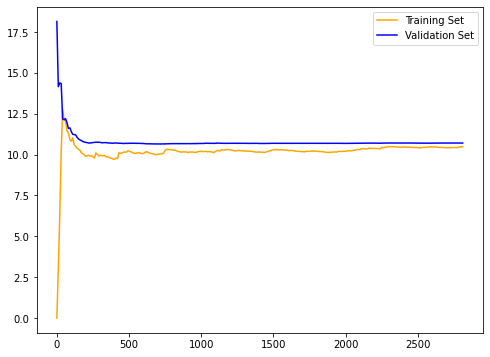

In [6]:
%%time

plot_learning_curves(train_rmse, val_rmse)


# Exercise 3

Plot the learning curve for our dataset using a `DecisionTreeRegressor`. If you elected to write your code as functions, this should be very easy to do (just swap `LinearRegression` with `DecisionTreeRegressor` as your algorithm). Otherwise, you will need to do some copy-pasting / rewriting of your code.

Plot the entire range of the learning curve first. Then, do a second plot zooming in between 2500-2800 samples on the x-axis, and 8-11% RSME on the y-axis. What do you observe?

What do you conclude from the two plots? 

In [25]:
from sklearn.tree import DecisionTreeRegressor

# Very simple 
dt_model = DecisionTreeRegressor()

train_rmse, val_rmse = calculate_learning_curves(dt_model, X_train, X_val, y_train, y_val)

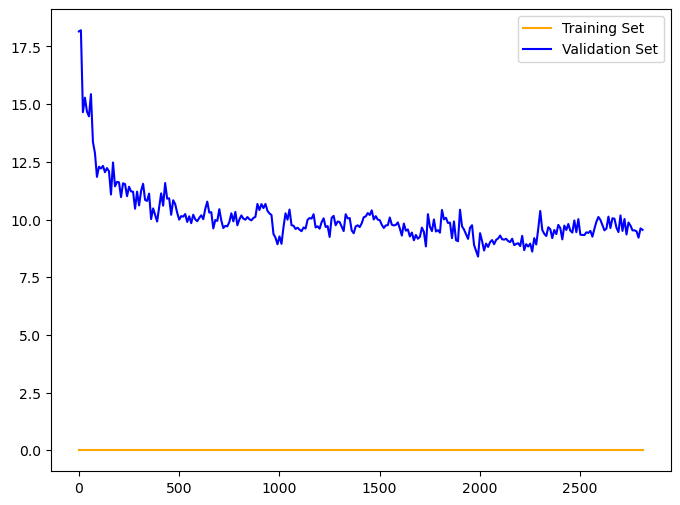

In [26]:
plot_learning_curves(train_rmse, val_rmse)

# Exercise 4

Redo exercise 3, but this time when you create your `DecisionTreeRegressor` set the `max_depth` hyperparameter to 4. This will direct the algorithm to not create trees that have more than 4 branches.

Plot the entire range of the learning curve first. Then, do a second plot zooming in between 2500-2800 samples on the x-axis, and 8-10% RMSE on the y-axis. What do you observe?

What do you conclude from the two plots? 

In [27]:
dt_model = DecisionTreeRegressor(max_depth = 4)

train_rmse, val_rmse = calculate_learning_curves(dt_model, X_train, X_val, y_train, y_val)

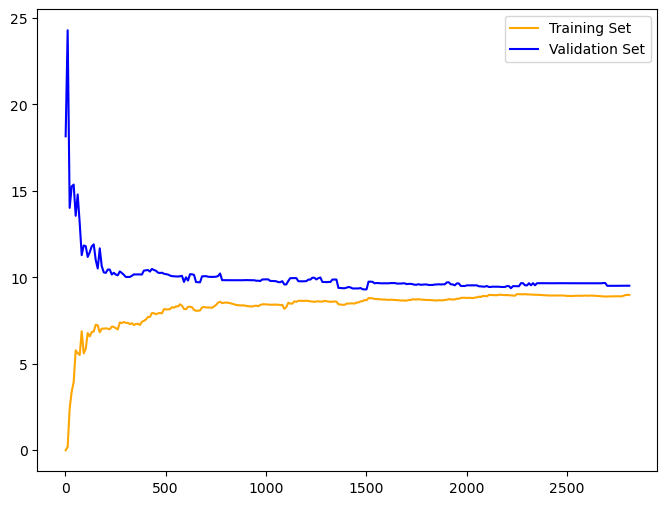

In [28]:
plot_learning_curves(train_rmse, val_rmse)

# Exercise 5

You are now going to play with a new dataset ('Datasets/litho_log_data.csv'): it contains a large number of observations of downhole logs and the name of the lithologies associated with the log response. 

* 'DEPTH_WMSF': the depth of the measurement below seafloor
* 'HCGR': Total gamma ray counts
* 'HFK': Potassium counts
* 'HTHO': Thorium counts
* 'HURA': Uranium counts
* 'IDPH': Deep Phasor Dual Induction–Spherically Focused Resistivity
* 'IMPH': Medium Phasor Dual Induction–Spherically Focused Resistivity
* 'SFLU': Shallow Phasor Dual Induction–Spherically Focused Resistivity
* 'lithology': our target value, a string representing the name of the lithology

The goal of the exercise will be to predict lithology using the `RandomForestClassifier` algorithm, which can be found in the `ensemble` module of `sklearn`; you want to identify the best set of hyperparameters to use for this task using `GridSearchCV`.

Here is what you should do:

1. Open the dataset, drop duplicates.
2. Some values in the datasets need to be replaced. Any values of 1950 in IDPH or IMPH need to be replaced by a `np.nan`. Any value of 9700 in SFLU need to be replaced by `np.nan`. This is because these values represent bad measurements.
3. Separate the dataset into the features and the target variable.
    - You'll notice that this dataset uses strings as the target variable - however, many Classifier models perform much better if the target variable is encoded as integers rather than strings. We should fix this before moving on.
    - One way of doing this is by manually changing each unique string into a number...but of course, there's an easier way to do this in the sklearn ecosystem using something called a `LabelEncoder`. LabelEncoders are very similar to Scalers and Imputers, so you should be able to use it without too much issue. Check the documentation for more info!
3. Split your data as usual (70/30)
4. Set a pipeline with an `SimpleImputer`, a scaler of your choice, and a `RandomForestClassifer(random_state=42)`
5. Set a parameter grid containing one dictionary. The dictionary should give three objects to change: the `scaler` can be either a `StandardScaler` or a `MinMaxScaler`, the `max_depth` of your `RandomForestClassifer` can be either 3, 10, 30 or 40, and finally, the `n_estimators` (number of trees) can be either 10, 100, or 500.
6. Train a `GridSearchCV` on your pipeline and your parameters using 5-fold cross-validation. Use 'accuracy' as your scoring metric.
7. Record what your best parameters are, and what your best accuracy is.

**Note**: This can take a while! One thing you can do is set the parameter `verbose = 5` in GridSearchCV if you're bored. This will print out the progress of your program in the terminal, so you can feel like your code is doing something while you wait.

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Load data and drop duplicates
data = pd.read_csv('Data/litho_log_data.csv')
data.drop_duplicates(inplace = True)

# Remove nonsense readings based on prior knowledge
data[['IDPH', 'IMPH']] = data[['IDPH', 'IMPH']].apply(lambda x: np.where(x == 1950, np.nan, x))
data['SFLU'] = data['SFLU'].apply(lambda x: np.where(x == 9700, np.nan, x))

encoder = LabelEncoder()

# Split into features and target
X = data.drop(columns = 'lithology')
y = encoder.fit_transform(data['lithology'])

# prove to yourself that the lithology column has been converted into numbers
# rather than strings
print('Target variable - now numbers instead of strings:', y)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Create pipeline
pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    # Note that you can instantiate a specific model in the pipeline 
    # In this cases, the model has been instantiated with random_state = 42, but you
    # can include other requirements such as max_depth = 4, etc.
    ('model', RandomForestClassifier(random_state = 42))
])

# Create a parameter grid according to the requirements in the question
# Note that to specify individual parameters, you need the component name (e.g., 'model')
# followed by two underscores followed by the name of the hyperparameter
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'model__max_depth': [3, 10, 30, 40],
    'model__n_estimators': [10, 100, 500]
}

searcher = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5,
    scoring='accuracy', 
    n_jobs=-1,
    verbose = 5
)

searcher

Target variable - now numbers instead of strings: [1 1 1 ... 4 2 4]


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 10, 30, 40],
                         'model__n_estimators': [10, 100, 500],
                         'scaler': [StandardScaler(), MinMaxScaler()]},
             scoring='accuracy', verbose=5)

In [10]:
# Fit the searcher
searcher.fit(X_train, y_train)

# You can use `searcher.best_score_` to see the score of the best performing model. Alternatively, you can get a more
# comprehensive report in the next cell...

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 10, 30, 40],
                         'model__n_estimators': [10, 100, 500],
                         'scaler': [StandardScaler(), MinMaxScaler()]},
             scoring='accuracy', verbose=5)

In [11]:
# Use this to increase the column width
pd.options.display.max_colwidth = 100

# Convert the results of the cross_validation to a dataframe, then sort values to see the best performing model
pd.DataFrame(searcher.cv_results_)[['params','mean_test_score','rank_test_score']].sort_values(by = 'rank_test_score')

,params,mean_test_score,rank_test_score
16,"{'model__max_depth': 30, 'model__n_estimators': 500, 'scaler': StandardScaler()}",0.912338,1
22,"{'model__max_depth': 40, 'model__n_estimators': 500, 'scaler': StandardScaler()}",0.912338,1
23,"{'model__max_depth': 40, 'model__n_estimators': 500, 'scaler': MinMaxScaler()}",0.911549,3
17,"{'model__max_depth': 30, 'model__n_estimators': 500, 'scaler': MinMaxScaler()}",0.911549,3
20,"{'model__max_depth': 40, 'model__n_estimators': 100, 'scaler': StandardScaler()}",0.911437,5
14,"{'model__max_depth': 30, 'model__n_estimators': 100, 'scaler': StandardScaler()}",0.911437,5
21,"{'model__max_depth': 40, 'model__n_estimators': 100, 'scaler': MinMaxScaler()}",0.910310,7
15,"{'model__max_depth': 30, 'model__n_estimators': 100, 'scaler': MinMaxScaler()}",0.910310,7
10,"{'model__max_depth': 10, 'model__n_estimators': 500, 'scaler': StandardScaler()}",0.903549,9
8,"{'model__max_depth': 10, 'model__n_estimators': 100, 'scaler': StandardScaler()}",0.903437,10


In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    # Note that you can either specify a specific set of values, or you can specify
    # a distribution of random values
    'model__max_depth': randint(3, 40),
    'model__n_estimators': randint(10, 500)
}

random_searcher = RandomizedSearchCV(
    pipe, 
    param_grid,
    # Choose an appropriate number - use your common sense!
    # You don't want your training to take >30 mins, esp in an exam!
    n_iter = 24,
    cv=5,
    scoring='accuracy', 
    n_jobs=-1,
    verbose = 5,
    random_state = 42
)

In [64]:
random_searcher.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=24, n_jobs=-1,
                   param_distributions={'model__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B4871F2590>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B48711B1F0>,
                                        'scaler': [StandardScaler(),
                                                   MinMaxScaler()]},
                   random_state=42, scoring='accuracy', verbose=5)

In [65]:
# Convert the results of the cross_validation to a dataframe, then sort values to see the best performing model
pd.DataFrame(random_searcher.cv_results_)[['params','mean_test_score','rank_test_score']].sort_values(by = 'rank_test_score')

,params,mean_test_score,rank_test_score
10,"{'model__max_depth': 27, 'model__n_estimators': 58, 'scaler': StandardScaler()}",0.913352,1
0,"{'model__max_depth': 31, 'model__n_estimators': 280, 'scaler': StandardScaler()}",0.913239,2
15,"{'model__max_depth': 20, 'model__n_estimators': 397, 'scaler': StandardScaler()}",0.913014,3
16,"{'model__max_depth': 16, 'model__n_estimators': 251, 'scaler': MinMaxScaler()}",0.912225,4
2,"{'model__max_depth': 21, 'model__n_estimators': 224, 'scaler': StandardScaler()}",0.912113,5
4,"{'model__max_depth': 38, 'model__n_estimators': 369, 'scaler': MinMaxScaler()}",0.912000,6
9,"{'model__max_depth': 24, 'model__n_estimators': 262, 'scaler': MinMaxScaler()}",0.911549,7
3,"{'model__max_depth': 13, 'model__n_estimators': 97, 'scaler': StandardScaler()}",0.911324,8
7,"{'model__max_depth': 32, 'model__n_estimators': 303, 'scaler': MinMaxScaler()}",0.911324,8
8,"{'model__max_depth': 23, 'model__n_estimators': 170, 'scaler': MinMaxScaler()}",0.911211,10
